<a href="https://colab.research.google.com/github/tuhinmallick/AI-for-Fashion/blob/main/Autogluon_Timeseries_FullTutorial_Substack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gluonts
!pip install autogluon
# if you run on Colab and you face the error "libtorchaudio.so: undefined symbol", install proper versions of Torch:
#!pip install autogluon.timeseries torchaudio torchvision torchtext --extra-index-url https://download.pytorch.org/whl/cu118

# or check here:
# https://github.com/autogluon/autogluon/issues/3428

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.3/372.3 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.

In [ ]:
pip show autogluon

Name: autogluon
Version: 0.8.2
Summary: AutoML for Image, Text, and Tabular Data
Home-page: https://github.com/autogluon/autogluon
Author: AutoGluon Community
Author-email: 
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: autogluon.core, autogluon.features, autogluon.multimodal, autogluon.tabular, autogluon.timeseries
Required-by: 


In [ ]:
pip show torch

Name: torch
Version: 1.13.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: nvidia-cublas-cu11, nvidia-cuda-nvrtc-cu11, nvidia-cuda-runtime-cu11, nvidia-cudnn-cu11, typing-extensions
Required-by: accelerate, autogluon.multimodal, autogluon.timeseries, fastai, pytorch-lightning, pytorch-metric-learning, timm, torchaudio, torchdata, torchmetrics, torchtext, torchvision


In [ ]:
pip show pytorch-lightning

Name: pytorch-lightning
Version: 1.9.5
Summary: PyTorch Lightning is the lightweight PyTorch wrapper for ML researchers. Scale your models. Write less boilerplate.
Home-page: https://github.com/Lightning-AI/lightning
Author: Lightning AI et al.
Author-email: pytorch@lightning.ai
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: fsspec, lightning-utilities, numpy, packaging, PyYAML, torch, torchmetrics, tqdm, typing-extensions
Required-by: autogluon.multimodal, autogluon.timeseries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import subprocess

# Load Data

In [ ]:
from gluonts.dataset.repository import get_dataset, dataset_names
from gluonts.dataset.util import to_pandas
from gluonts.evaluation.metrics import mse
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

dataset = get_dataset("tourism_monthly")

Download tourism_monthly_dataset.zip:: 200kB [00:02, 93.5kB/s]
creating json files: 100%|██████████| 366/366 [00:00<00:00, 63521.13it/s]


In [ ]:
# default download path is at $HOME/.gluonts/datasets. Here assuming $HOME is root:
ls -la root/.gluonts/datasets/tourism_monthly

total 20
drwxr-xr-x 4 root root 4096 Nov 10 22:02 ./
drwxr-xr-x 3 root root 4096 Nov 10 22:02 ../
-rw-r--r-- 1 root root  186 Nov 10 22:02 metadata.json
drwxr-xr-x 2 root root 4096 Nov 10 22:02 test/
drwxr-xr-x 2 root root 4096 Nov 10 22:02 train/


In [ ]:
# use the following to download the dataset to a different path:

# from pathlib import Path
# # download to $HOME/data
# path = Path.home() / "data"

# dataset = get_dataset("tourism_monthly",path=path)

In [ ]:
dataset.metadata

MetaData(freq='M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat_0', cardinality='366')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=24)

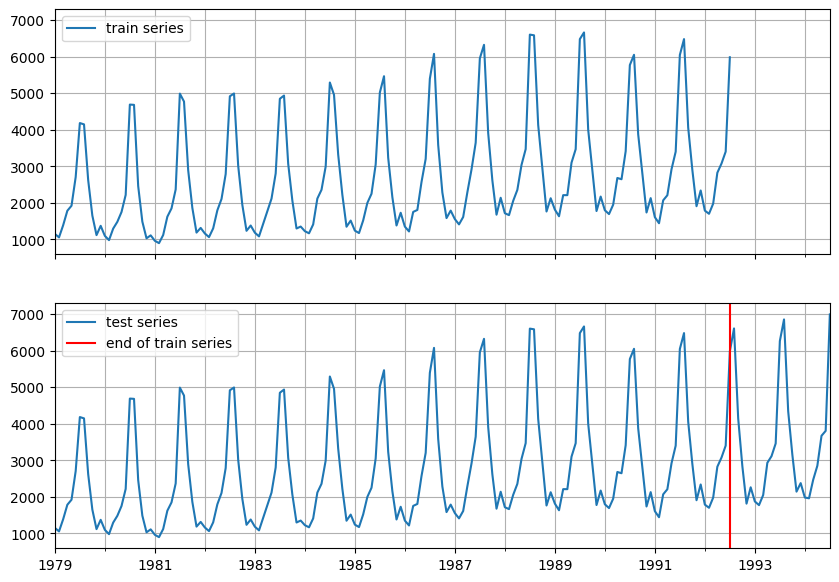

In [ ]:
#Visualizing the first time-series of our dataset

train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color="r")
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [ ]:
# the format of the first time-series T1 of our dataset
next(iter(dataset.train))

{'target': array([1149.87  , 1053.8002, 1388.8798, 1783.3702, 1921.0251, 2704.9448,
        4184.4136, 4148.354 , 2620.725 , 1650.3   , 1115.92  , 1370.6251,
        1096.315 ,  978.46  , 1294.685 , 1480.4651, 1748.8652, 2216.9202,
        4690.5186, 4682.8643, 2459.5798, 1484.4901, 1028.9851, 1109.3649,
         960.8751,  896.3501, 1118.6552, 1619.995 , 1847.9949, 2367.045 ,
        4991.16  , 4772.9443, 2894.6785, 1860.4801, 1185.1501, 1313.6599,
        1160.915 , 1061.5049, 1301.77  , 1794.3798, 2106.455 , 2789.035 ,
        4917.8467, 4994.4834, 3016.7542, 1941.5051, 1234.135 , 1378.7202,
        1182.975 , 1081.66  , 1424.1101, 1774.535 , 2115.4202, 2804.84  ,
        4849.498 , 4937.475 , 3074.2236, 2063.4253, 1297.3552, 1350.7102,
        1224.3601, 1165.8152, 1409.33  , 2116.5498, 2357.135 , 2995.0703,
        5295.212 , 4957.905 , 3321.9592, 2221.1802, 1345.9   , 1514.0151,
        1239.5502, 1172.1599, 1518.9752, 1996.8751, 2248.685 , 3053.4402,
        5019.4536, 5466.7803

# Prepare the Data

In [ ]:
#Next we transform our dataset into the long-format that Autogluon expects

def long_format(gluon_dataset):

  data_ds = [{ 'item_id': x['item_id'],  'start': x['start'], 'target': x['target'] } for x in gluon_dataset]
  data_ds = [{
      'item_id': data['item_id'],
      'start': [date.strftime('%Y-%m') for date in [data['start'] + i for i in range(len(data['target']))]],
      'target': data['target']
  } for data in data_ds]


  pandas_df = pd.DataFrame(data_ds).explode(['start','target'])
  return pandas_df

In [ ]:
train = long_format(dataset.train)
train

,item_id,start,target
0,T1,1979-01,1149.869995
0,T1,1979-02,1053.800171
0,T1,1979-03,1388.879761
0,T1,1979-04,1783.370239
0,T1,1979-05,1921.025146
...,...,...,...
365,T366,1998-08,3900.0
365,T366,1998-09,4525.0
365,T366,1998-10,2854.0
365,T366,1998-11,1794.0


In [ ]:
train.dtypes

item_id    object
start      object
target     object
dtype: object

In [ ]:
test = long_format(dataset.test)
test

,item_id,start,target
0,T1,1979-01,1149.869995
0,T1,1979-02,1053.800171
0,T1,1979-03,1388.879761
0,T1,1979-04,1783.370239
0,T1,1979-05,1921.025146
...,...,...,...
365,T366,2000-08,7778.0
365,T366,2000-09,7859.0
365,T366,2000-10,4802.0
365,T366,2000-11,2426.0


In [ ]:
train_data = TimeSeriesDataFrame.from_data_frame(
    train,
    id_column="item_id",
    timestamp_column="start"
)
train_data

target
item_id timestamp              
T1      1979-01-01  1149.869995
        1979-02-01  1053.800171
        1979-03-01  1388.879761
        1979-04-01  1783.370239
        1979-05-01  1921.025146
...                         ...
T366    1998-08-01       3900.0
        1998-09-01       4525.0
        1998-10-01       2854.0
        1998-11-01       1794.0
        1998-12-01        921.0

[100496 rows x 1 columns]

In [ ]:
#enforce that data has explictly monthly frequency so that Autogluon does not complain later
train_data = train_data.reset_index().groupby('item_id', sort=False).resample('M', on='timestamp').sum().drop(columns=['item_id'])
train_data

target
item_id timestamp              
T1      1979-01-31  1149.869995
        1979-02-28  1053.800171
        1979-03-31  1388.879761
        1979-04-30  1783.370239
        1979-05-31  1921.025146
...                         ...
T366    1998-08-31  3900.000000
        1998-09-30  4525.000000
        1998-10-31  2854.000000
        1998-11-30  1794.000000
        1998-12-31   921.000000

[100496 rows x 1 columns]

In [ ]:
test_data = TimeSeriesDataFrame.from_data_frame(
    test,
    id_column="item_id",
    timestamp_column="start"
)
test_data.head()

target
item_id timestamp              
T1      1979-01-01  1149.869995
        1979-02-01  1053.800171
        1979-03-01  1388.879761
        1979-04-01  1783.370239
        1979-05-01  1921.025146

In [ ]:
#do the same so that test_data have monthly frequency
test_data = test_data.reset_index().groupby('item_id', sort=False).resample('M', on='timestamp').sum().drop(columns=['item_id'])
test_data

target
item_id timestamp              
T1      1979-01-31  1149.869995
        1979-02-28  1053.800171
        1979-03-31  1388.879761
        1979-04-30  1783.370239
        1979-05-31  1921.025146
...                         ...
T366    2000-08-31  7778.000000
        2000-09-30  7859.000000
        2000-10-31  4802.000000
        2000-11-30  2426.000000
        2000-12-31   637.000000

[109280 rows x 1 columns]

# Multiple Time Series Benchmark

## Run 1: Low quality (fast_training)

In [ ]:
%%time
multiple_timeseries_path = "multiple-timeseries"
model_path_fast= "tourism-quarterly-fast"

path = os.path.join(multiple_timeseries_path, model_path_fast)

predictor = TimeSeriesPredictor(
    prediction_length=24,
    #path = "multiple_timeseries_path/tourism-quarterly-fast"
    path= path,
    target="target",
    eval_metric="MSE"
)

predictor.fit(
    train_data,
    presets="fast_training",
    random_seed=42
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: fast_training
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'MSE',
 'excluded_model_types': None,
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'fast_training',
 'num_val_windows': 1,
 'prediction_length': 24,
 'random_seed': 42,
 'target': 'target',
 'time_limit': None,
 'verbosity': 2}
Provided training data set with 100496 rows, 366 items (item = single time series). Average time series length is 274.6. Data frequency is 'M'.
INFO:lightning_fabric.utilities.seed:Global seed set to 42
AutoGluon will save models to multiple-timeseries/tourism-quarterly-fast/
AutoGluon will gauge predictive performance using evaluation metric: 'MSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'targe

CPU times: user 2min 10s, sys: 1.49 s, total: 2min 12s
Wall time: 2min 29s


### Next, we show how you can save and recover the model

In [ ]:
# Zip the model into a file called tourism-quarterly-fast.zip
# Delete the model path tourism-quarterly-fast.zip
# Recover the model tourism-quarterly-fast.zip and load it again

# !cd multiple-timeseries && zip -r -q tourism-quarterly-fast.zip tourism-quarterly-fast
subprocess.run(["zip", "-r", "-q", f"{model_path_fast}.zip", model_path_fast], cwd=multiple_timeseries_path)

# !cd multiple-timeseries && rm -r tourism-quarterly-fast
subprocess.run(["rm", "-r", model_path_fast], cwd=multiple_timeseries_path)

# !cd multiple-timeseries && unzip tourism-quarterly-fast.zip
subprocess.run(["unzip", f"{model_path_fast}.zip"], cwd=multiple_timeseries_path)
predictor = TimeSeriesPredictor.load(path)

Loading predictor from path multiple-timeseries/tourism-quarterly-fast/


### Evaluation and Predictions

In [ ]:
# predictions on the test set
predictions = predictor.predict(train_data, random_seed=42)
predictions

# you can also generate predictions for a specific model, e.g. for Theta
# predictor.predict(train_data, model='Theta')

INFO:lightning_fabric.utilities.seed:Global seed set to 42
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean          0.1          0.2          0.3  \
item_id timestamp                                                        
T1      1992-08-31  6544.757633  6013.469578  6195.849856  6327.358868   
        1992-09-30  4121.413961  3588.000265  3771.110232  3903.145401   
        1992-10-31  2961.584764  2426.054691  2609.891166  2742.450199   
        1992-11-30  1965.355003  1427.717694  1612.277541  1745.358174   
        1992-12-31  2390.791049  1851.055519  2036.335641  2169.935645   
...                         ...          ...          ...          ...   
T366    2000-08-31  2873.671620  -629.908647   572.798502  1440.034974   
        2000-09-30  3656.255630   103.289571  1322.949848  2202.410718   
        2000-10-31  1815.482500 -1786.955901  -550.312785   341.393906   
        2000-11-30   689.381487 -2962.620229 -1708.963045  -804.988013   
        2000-12-31   178.136168 -3685.382896 -2359.116150 -1402.784516   

                            0.4          0.5          0.6          0.7  \
item_id timestamp                                                        
T1      1992-08-31  6439.728469  6544.757633  6649.786797  6762.156399   
        1992-09-30  4015.964584  4121.413961  4226.863339  4339.682522   
        1992-10-31  2855.717004  2961.584764  3067.452523  3180.719328   
        1992-11-30  1859.070669  1965.355003  2071.639338  2185.351832   
        1992-12-31  2284.091922  2390.791049  2497.490175  2611.646453   
...                         ...          ...          ...          ...   
T366    2000-08-31  2181.056563  2873.671620  3566.286678  4307.308266   
        2000-09-30  2953.877604  3656.255630  4358.633655  5110.100541   
        2000-10-31  1103.324396  1815.482500  2527.640604  3289.571093   
        2000-11-30   -32.574680   689.381487  1411.337653  2183.750987   
        2000-12-31  -585.634397   178.136168   941.906733  1759.056852   

                            0.8          0.9  
item_id timestamp                             
T1      1992-08-31  6893.665410  7076.045688  
        1992-09-30  4471.717691  4654.827657  
        1992-10-31  3313.278361  3497.114836  
        1992-11-30  2318.432466  2502.992313  
        1992-12-31  2745.246456  2930.526578  
...                         ...          ...  
T366    2000-08-31  5174.544738  6377.251887  
        2000-09-30  5989.561411  7209.221688  
        2000-10-31  4181.277784  5417.920900  
        2000-11-30  3087.726018  4341.383203  
        2000-12-31  2715.388486  4041.655232  

[8784 rows x 10 columns]

In [ ]:
# validate loss  - actually evaluates at the last prediction_length size of the training dataset(which is the validation set)
fast_valid_loss = predictor.evaluate(train_data)
#test loss
fast_test_loss = predictor.evaluate(test_data)

predictions_df = pd.DataFrame({
    'item_id': test.groupby('item_id').tail(24)['item_id'].values,
    'predictions': predictions.reset_index()['mean'],
    'target': test.groupby('item_id').tail(24)['target'].values
})

predictions_df = predictions_df.groupby('item_id',sort=False).apply(lambda group: mse(group['target'], group['predictions'])).reset_index()
predictions_df.columns = ['item_id', 'MSE']

print(f"Validation loss: {fast_valid_loss},  Test loss: {fast_test_loss},  Test loss manual {predictions_df['MSE'].mean()}")
#Validation loss: -161640431.36874282,  Test loss: -54499463.986354746,  Test loss manual 54499463.986354746

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


Validation loss: -161640431.36874282,  Test loss: -54499463.986354746,  Test loss manual 54499463.986354746


### Out-Of-Sample Forecasts

In [ ]:
out_of_sample_predicitions = predictor.predict(test_data)
out_of_sample_predicitions

INFO:lightning_fabric.utilities.seed:Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean          0.1          0.2          0.3  \
item_id timestamp                                                        
T1      1994-08-31  7037.074392  6530.606458  6704.466498  6829.831819   
        1994-09-30  4518.200500  4009.578237  4184.177814  4310.076393   
        1994-10-31  3312.393012  2801.626517  2976.962165  3103.391502   
        1994-11-30  2287.006947  1774.106168  1950.174472  2077.132106   
        1994-12-31  2526.602467  2011.577211  2188.374803  2315.858307   
...                         ...          ...          ...          ...   
T366    2002-08-31  6982.534833  3582.483403  4749.651229  5591.261348   
        2002-09-30  6510.139179  3063.597247  4246.724307  5099.842157   
        2002-10-31  3898.970073   405.699093  1604.867276  2469.551904   
        2002-11-30  1743.081779 -1797.156018  -581.865092   294.445168   
        2002-12-31   636.220773 -3108.589182 -1823.072835  -896.125106   

                            0.4          0.5          0.6          0.7  \
item_id timestamp                                                        
T1      1994-08-31  6936.951863  7037.074392  7137.196921  7244.316966   
        1994-09-30  4417.652086  4518.200500  4618.748913  4726.324607   
        1994-10-31  3211.420710  3312.393012  3413.365314  3521.394521   
        1994-11-30  2185.612723  2287.006947  2388.401170  2496.881787   
        1994-12-31  2424.788259  2526.602467  2628.416674  2737.346627   
...                         ...          ...          ...          ...   
T366    2002-08-31  6310.386163  6982.534833  7654.683503  8373.808319   
        2002-09-30  5828.799904  6510.139179  7191.478454  7920.436201   
        2002-10-31  3208.393036  3898.970073  4589.547111  5328.388243   
        2002-11-30  1043.219975  1743.081779  2442.943582  3191.718389   
        2002-12-31  -104.082449   636.220773  1376.523996  2168.566653   

                            0.8           0.9  
item_id timestamp                              
T1      1994-08-31  7369.682287   7543.542327  
        1994-09-30  4852.223186   5026.822762  
        1994-10-31  3647.823859   3823.159507  
        1994-11-30  2623.839421   2799.907725  
        1994-12-31  2864.830130   3041.627722  
...                         ...           ...  
T366    2002-08-31  9215.418438  10382.586263  
        2002-09-30  8773.554051   9956.681111  
        2002-10-31  6193.072871   7392.241054  
        2002-11-30  4068.028649   5283.319575  
        2002-12-31  3095.514382   4381.030728  

[8784 rows x 10 columns]

### Training Details Overview

In [ ]:
predictor.fit_summary()

****************** Summary of fit() ******************
Estimated performance of each model:
              model     score_val  pred_time_val  fit_time_marginal  fit_order
0  WeightedEnsemble -1.616404e+08      74.833035           7.075161          6
1               ETS -1.835060e+08      73.516437           0.197963          4
2             Theta -3.111759e+08      50.758906           0.255370          3
3     SeasonalNaive -4.434256e+08       1.316598           0.144151          2
4  RecursiveTabular -5.342941e+08       2.384888           9.879189          5
5             Naive -6.523117e+08       1.827074           0.324091          1
Number of models trained: 6
Types of models trained:
{'TimeSeriesGreedyEnsemble', 'MultiWindowBacktestingModel'}
****************** End of fit() summary ******************


{'model_types': {'Naive': 'MultiWindowBacktestingModel',
  'SeasonalNaive': 'MultiWindowBacktestingModel',
  'Theta': 'MultiWindowBacktestingModel',
  'ETS': 'MultiWindowBacktestingModel',
  'RecursiveTabular': 'MultiWindowBacktestingModel',
  'WeightedEnsemble': 'TimeSeriesGreedyEnsemble'},
 'model_performance': {'Naive': -652311705.7681451,
  'SeasonalNaive': -443425619.5205334,
  'Theta': -311175880.1415664,
  'ETS': -183506047.7344074,
  'RecursiveTabular': -534294094.4400102,
  'WeightedEnsemble': -161640431.36874282},
 'model_best': 'WeightedEnsemble',
 'model_paths': {'Naive': 'multiple-timeseries/tourism-quarterly-fast/models/Naive/',
  'SeasonalNaive': 'multiple-timeseries/tourism-quarterly-fast/models/SeasonalNaive/',
  'Theta': 'multiple-timeseries/tourism-quarterly-fast/models/Theta/',
  'ETS': 'multiple-timeseries/tourism-quarterly-fast/models/ETS/',
  'RecursiveTabular': 'multiple-timeseries/tourism-quarterly-fast/models/RecursiveTabular/',
  'WeightedEnsemble': 'multiple

In [ ]:
#Validation loss: -161640431.36874282,  Test loss: -54499463.986354746
predictor.leaderboard(test_data, silent=True)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-5.449946e+07,-1.616404e+08,75.555846,74.833035,7.075161,6
1,SeasonalNaive,-6.726176e+07,-4.434256e+08,1.152187,1.316598,0.144151,2
2,ETS,-7.193707e+07,-1.835060e+08,74.367808,73.516437,0.197963,4
3,Theta,-8.053012e+07,-3.111759e+08,21.759610,50.758906,0.255370,3
4,RecursiveTabular,-3.900677e+08,-5.342941e+08,1.271206,2.384888,9.879189,5
5,Naive,-6.191112e+08,-6.523117e+08,1.695251,1.827074,0.324091,1


### Plotting Predictions

In [ ]:
def plot_single_timeseries(train_data, predictions, test_data, item_id):
    plt.figure(figsize=(15, 3))

    y_past = train_data.loc[item_id]["target"]
    y_pred = predictions.loc[item_id]
    y_test = test_data.loc[item_id]["target"][-24:]

    colors = ['#FF6347', '#00FF7F', '#4169E1', '#FF69B4']

    plt.plot(y_past[-100:], label="Past Time Series", color=colors[0], linestyle='-')
    plt.plot(y_pred["mean"], label="Forecast", color=colors[1], linestyle='-')
    plt.plot(y_test, label="Observed", color=colors[2], linestyle='--')

    plt.fill_between(
        y_pred.index, y_pred["0.1"], y_pred["0.9"], color=colors[3], alpha=0.2, label="10%-90% Confidence Interval"
    )

    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Predictions for Item {item_id}")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


def plot_multiple_timeseries(train_data, predictions, test_data, item_ids_to_plot):

    colors = ['#FF6347', '#00FF7F', '#4169E1', '#FF69B4']

    plt.figure(figsize=(13, 13))
    for i, item_id in enumerate(item_ids_to_plot):
        plt.subplot(5, 1, i + 1)

        y_past = train_data.loc[item_id]["target"]
        y_pred = predictions.loc[item_id]
        y_test = test_data.loc[item_id]["target"][-24:]

        plt.plot(y_past[-100:], label="Past Time Series", color=colors[0], linestyle='-')
        plt.plot(y_pred["mean"], label="Forecast", color=colors[1], linestyle='-')
        plt.plot(y_test, label="Observed", color=colors[2], linestyle='--')

        plt.fill_between(
            y_pred.index, y_pred["0.1"], y_pred["0.9"], color=colors[3], alpha=0.2, label="10%-90% Confidence Interval"
        )

        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.title(f"Predictions for Item {item_id}")
        plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

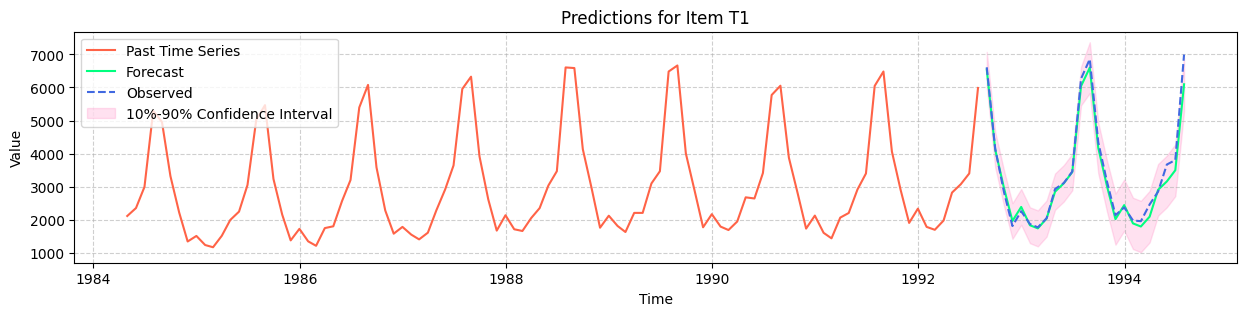

In [ ]:
plot_single_timeseries(train_data, predictions, test_data, item_id='T1')

In [ ]:
predictions_df.sort_values(by=['MSE'],ascending=False).head(5)

,item_id,MSE
13,T14,1.024772e+10
354,T355,4.420496e+09
356,T357,1.389108e+09
179,T180,3.918555e+08
35,T36,2.702366e+08


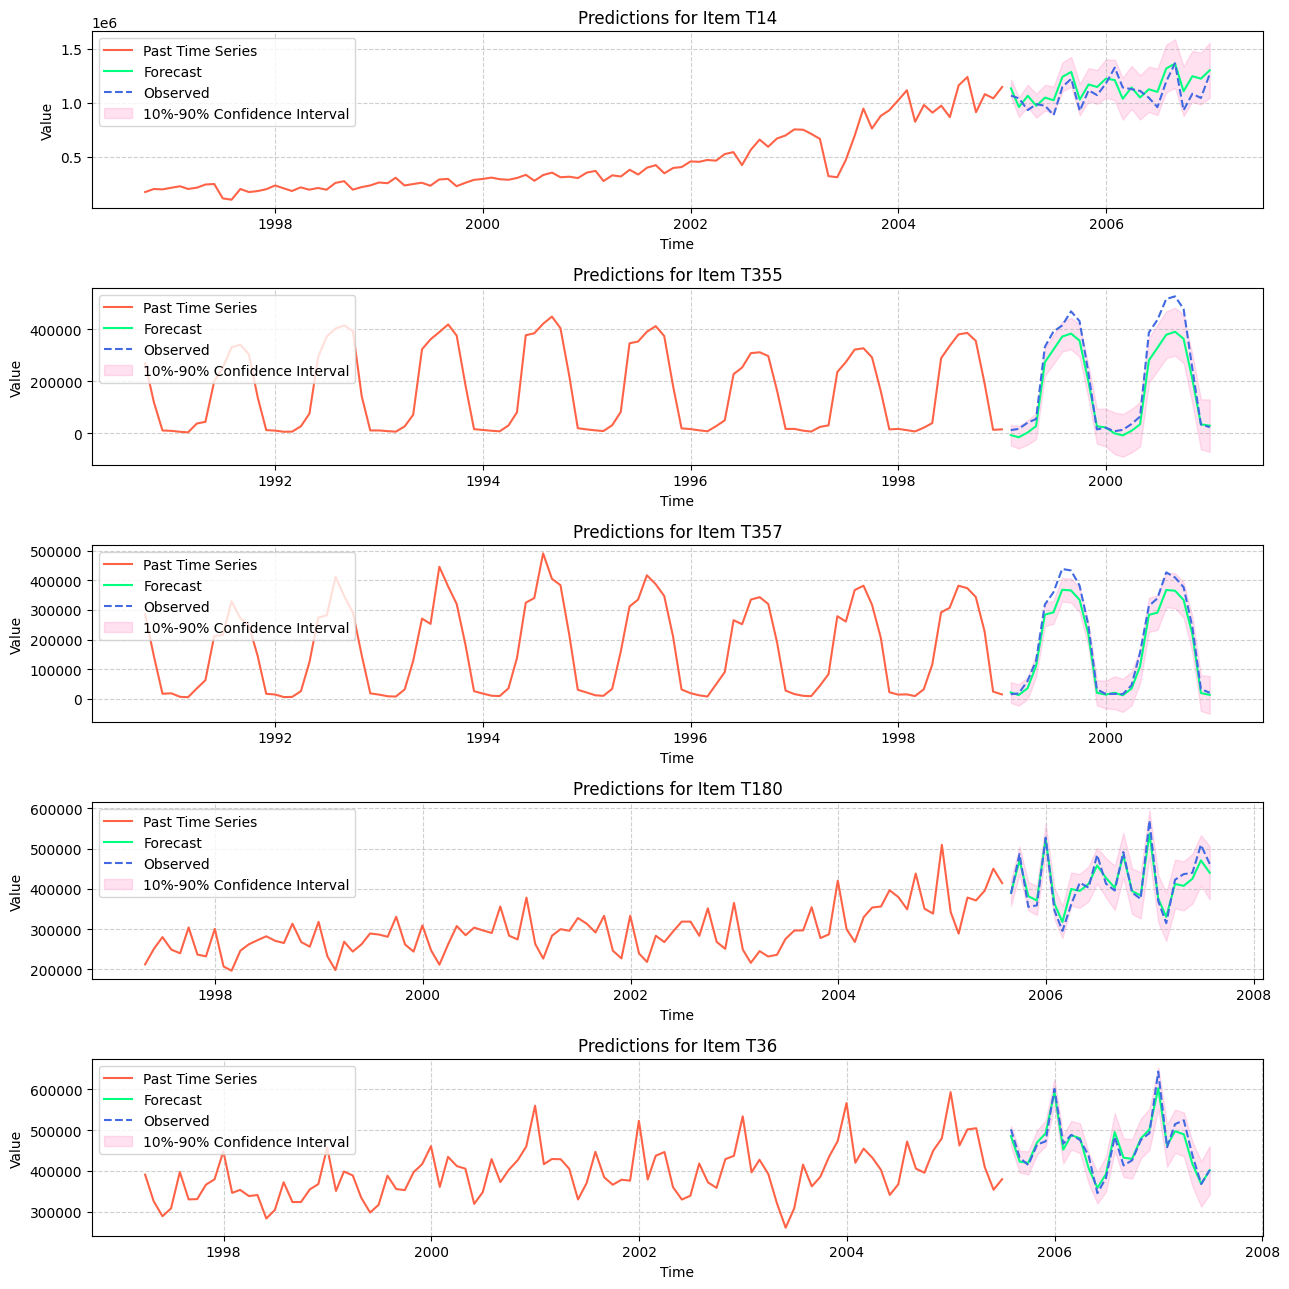

In [ ]:
item_ids_to_plot = predictions_df.sort_values(by=['MSE'],ascending=False).head(5)['item_id'].tolist()
plot_multiple_timeseries(train_data, predictions, test_data, item_ids_to_plot)

## Run 2: Medium Quality

In [ ]:
static_features = pd.DataFrame({'item_id':train['item_id'].unique(), 'domain':train['item_id'].unique() }).set_index('item_id')
static_features

,domain
item_id,
T1,T1
T2,T2
T3,T3
T4,T4
T5,T5
...,...
T362,T362
T363,T363
T364,T364


In [ ]:
train_data.static_features = static_features
test_data.static_features = static_features
train_data

target
item_id timestamp              
T1      1979-01-31  1149.869995
        1979-02-28  1053.800171
        1979-03-31  1388.879761
        1979-04-30  1783.370239
        1979-05-31  1921.025146
...                         ...
T366    1998-08-31  3900.000000
        1998-09-30  4525.000000
        1998-10-31  2854.000000
        1998-11-30  1794.000000
        1998-12-31   921.000000

[100496 rows x 1 columns]

In [ ]:
%%time
multiple_timeseries_path = "multiple-timeseries"
model_path_medium= "tourism-quarterly-medium"

path = os.path.join(multiple_timeseries_path, model_path_medium)

predictor = TimeSeriesPredictor(
    prediction_length=24,
    path=path,
    target="target",
    eval_metric="MSE",
)

predictor.fit(
    train_data,
    presets="medium_quality",
    random_seed=42
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: medium_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'MSE',
 'excluded_model_types': None,
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'medium_quality',
 'num_val_windows': 1,
 'prediction_length': 24,
 'random_seed': 42,
 'target': 'target',
 'time_limit': None,
 'verbosity': 2}
Provided training data set with 100496 rows, 366 items (item = single time series). Average time series length is 274.6. Data frequency is 'M'.
INFO:lightning_fabric.utilities.seed:Global seed set to 42
AutoGluon will save models to multiple-timeseries2/tourism-quarterly-medium/
AutoGluon will gauge predictive performance using evaluation metric: 'MSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           '

CPU times: user 6min 33s, sys: 2.04 s, total: 6min 35s
Wall time: 6min 40s


In [ ]:
subprocess.run(["zip", "-r", "-q", f"{model_path_medium}.zip", model_path_medium], cwd=multiple_timeseries_path)
subprocess.run(["rm", "-r", model_path_medium], cwd=multiple_timeseries_path)
subprocess.run(["unzip", f"{model_path_medium}.zip"], cwd=multiple_timeseries_path)

predictor = TimeSeriesPredictor.load(path)

In [ ]:
predictions = predictor.predict(train_data)

medium_valid_loss = predictor.evaluate(train_data)
medium_test_loss = predictor.evaluate(test_data)

predictions_df = pd.DataFrame({
    'item_id': test.groupby('item_id').tail(24)['item_id'].values,
    'predictions': predictions.reset_index()['mean'],
    'target': test.groupby('item_id').tail(24)['target'].values
})

predictions_df = predictions_df.groupby('item_id',sort=False).apply(lambda group: mse(group['target'], group['predictions'])).reset_index()
predictions_df.columns = ['item_id', 'MSE']

print(f"Validation loss: {medium_valid_loss},  Test loss: {medium_test_loss},  Test loss manual {predictions_df['MSE'].mean()}")

INFO:lightning_fabric.utilities.seed:Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


Validation loss: -220669240.86713514,  Test loss: -53541219.16449423,  Test loss manual 53541219.16449424


In [ ]:
predictor.leaderboard(test_data, silent=True)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,DeepAR,-4.801503e+07,-2.292397e+08,6.307413,1.976954,84.137495,6
1,WeightedEnsemble,-5.354122e+07,-2.257369e+08,11.063559,3.024508,7.832401,7
2,SeasonalNaive,-6.726176e+07,-4.434256e+08,1.140854,0.749609,0.106016,2
3,Theta,-8.053012e+07,-3.111759e+08,19.762507,17.448404,0.124761,3
4,RecursiveTabular,-2.233800e+08,-5.640593e+08,2.316466,0.976909,6.920811,5
5,AutoETS,-2.259750e+08,-3.256208e+08,330.271595,278.212346,0.164981,4
6,Naive,-6.191112e+08,-6.523117e+08,4.734751,1.047554,0.131576,1


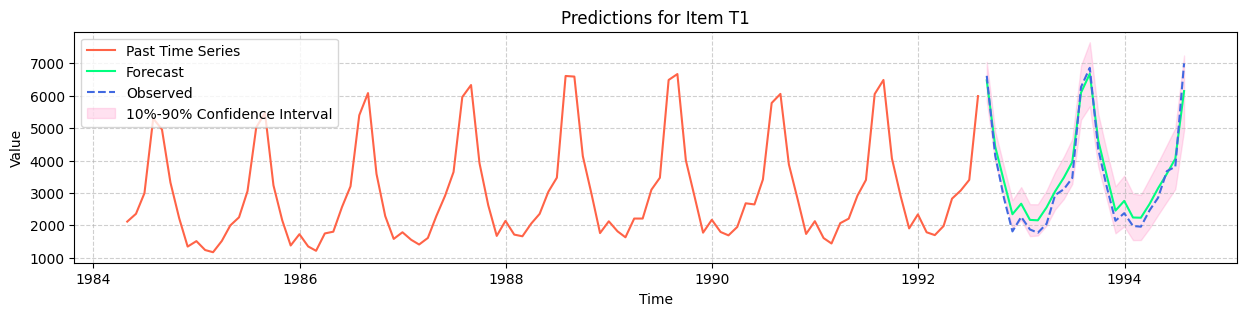

In [ ]:
plot_single_timeseries(train_data, predictions, test_data, item_id = "T1")

In [ ]:
predictions_df.sort_values(by=['MSE'],ascending=False).head(5)

,item_id,MSE
13,T14,1.024772e+10
354,T355,4.420496e+09
356,T357,1.389108e+09
179,T180,3.918555e+08
35,T36,2.702366e+08


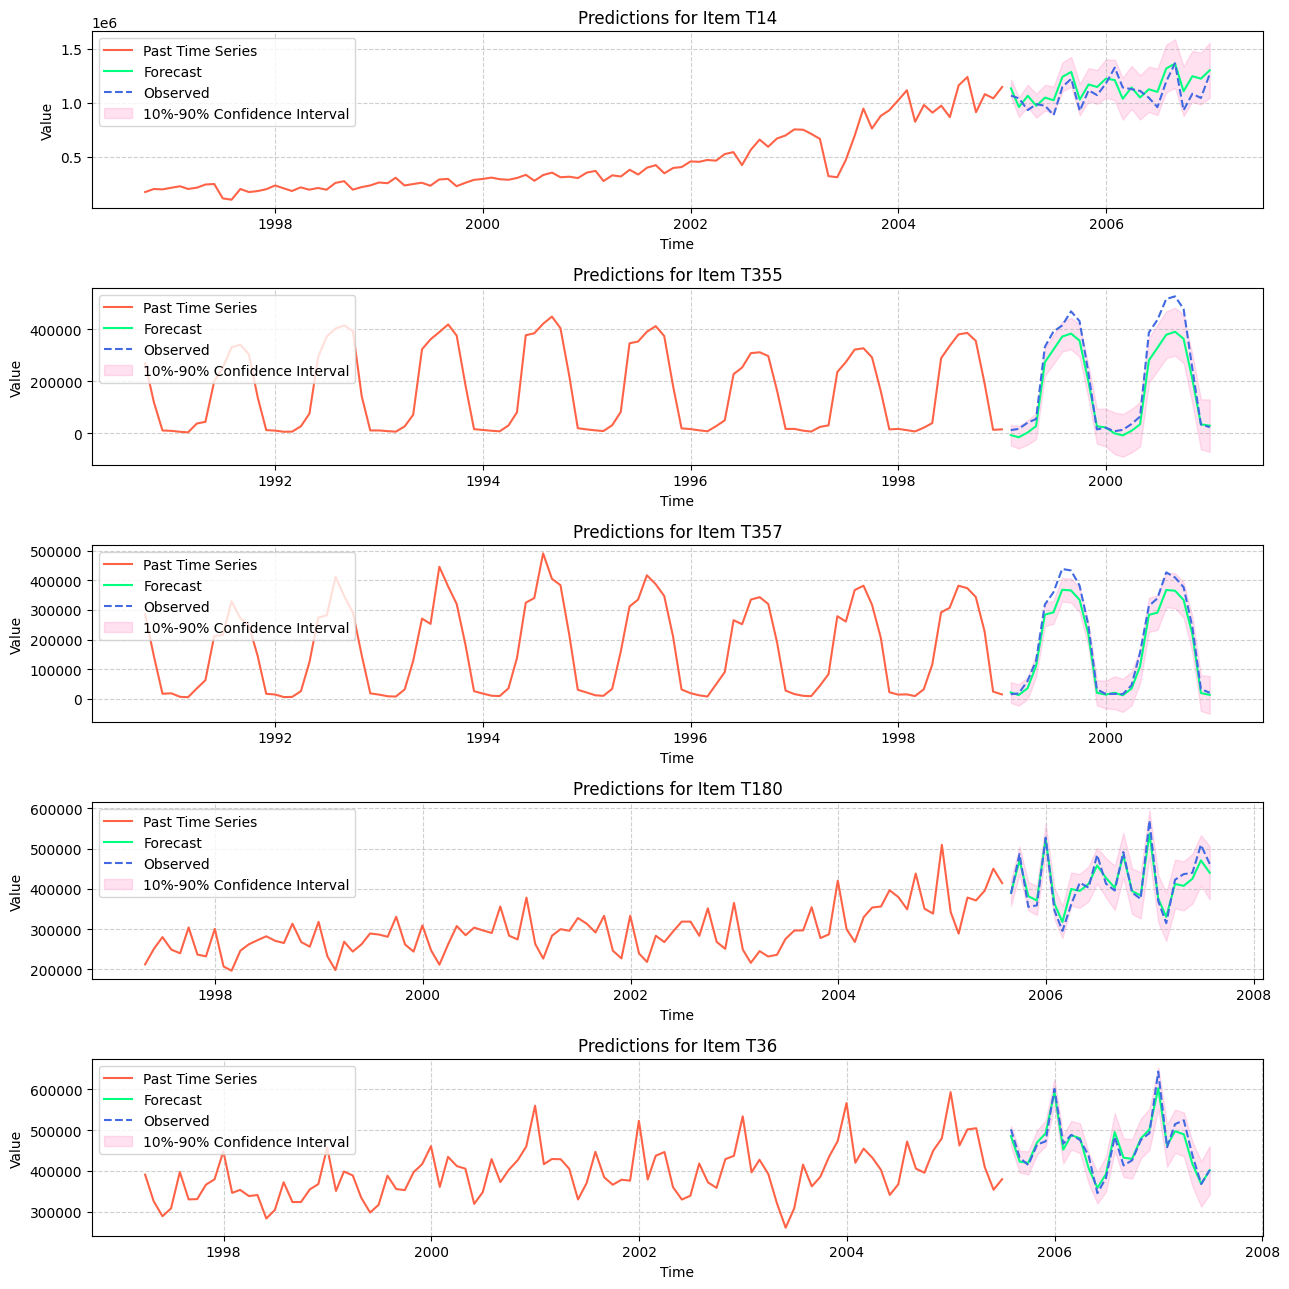

In [ ]:
item_ids_to_plot = predictions_df.sort_values(by=['MSE'],ascending=False).head(5)['item_id'].tolist()
plot_multiple_timeseries(train_data, predictions, test_data, item_ids_to_plot)

## Run 3: Best Quality

In [ ]:
static_features = pd.DataFrame({'item_id':train['item_id'].unique(), 'domain':train['item_id'].unique() }).set_index('item_id')
static_features

train_data.static_features = static_features
test_data.static_features = static_features
train_data

target
item_id timestamp              
T1      1979-01-31  1149.869995
        1979-02-28  1053.800171
        1979-03-31  1388.879761
        1979-04-30  1783.370239
        1979-05-31  1921.025146
...                         ...
T366    1998-08-31  3900.000000
        1998-09-30  4525.000000
        1998-10-31  2854.000000
        1998-11-30  1794.000000
        1998-12-31   921.000000

[100496 rows x 1 columns]

In [ ]:
%%time
multiple_timeseries_path = "multiple-timeseries"
model_path_best= "tourism-quarterly-best"

path = os.path.join(multiple_timeseries_path, model_path_best)
# path = "multiple-timeseries/tourism-quarterly-best"

predictor = TimeSeriesPredictor(
    prediction_length=24,
    path=path,
    target="target",
    eval_metric="MSE",
)

predictor.fit(
    train_data,
    presets="best_quality",
    random_seed=42
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: best_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'MSE',
 'excluded_model_types': None,
 'hyperparameter_tune_kwargs': {'num_trials': 3,
                                'scheduler': 'local',
                                'searcher': 'auto'},
 'hyperparameters': 'best_quality',
 'num_val_windows': 1,
 'prediction_length': 24,
 'random_seed': 42,
 'target': 'target',
 'time_limit': None,
 'verbosity': 2}
Provided training data set with 100496 rows, 366 items (item = single time series). Average time series length is 274.6. Data frequency is 'M'.
INFO:lightning_fabric.utilities.seed:Global seed set to 42
AutoGluon will save models to multiple-timeseries/tourism-quarterly-best/
AutoGluon will gauge predictive performance using evaluation metric: 'MSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can

  0%|          | 0/3 [00:00<?, ?it/s]

	Trained 3 models while tuning DeepAR.
	-174378229.7843= Validation score (-MSE)
	275.97  s     = Total tuning time
Hyperparameter tuning model: TemporalFusionTransformer. 
	-222341858.3133= Validation score (-MSE)
	295.56  s     = Training runtime
	1.00    s     = Validation (prediction) runtime
Hyperparameter tuning model: PatchTST. 
	-225840030.0476= Validation score (-MSE)
	111.16  s     = Training runtime
	1.42    s     = Validation (prediction) runtime
Hyperparameter tuning model: DirectTabular. 
	-576880735.8363= Validation score (-MSE)
	5.24    s     = Training runtime
	0.34    s     = Validation (prediction) runtime
Hyperparameter tuning model: AutoARIMA. 
	-378424500.0439= Validation score (-MSE)
	0.13    s     = Training runtime
	638.02  s     = Validation (prediction) runtime
Fitting simple weighted ensemble.
	-120638196.6731= Validation score (-MSE)
	12.48   s     = Training runtime
	640.62  s     = Validation (prediction) runtime
Training complete. Models trained: ['Naive

CPU times: user 28min 58s, sys: 10.7 s, total: 29min 8s
Wall time: 29min 47s


In [ ]:
subprocess.run(["zip", "-r", "-q", f"{model_path_best}.zip", model_path_best], cwd=multiple_timeseries_path)
subprocess.run(["rm", "-r", model_path_best], cwd=multiple_timeseries_path)
subprocess.run(["unzip", f"{model_path_best}.zip"], cwd=multiple_timeseries_path)

predictor = TimeSeriesPredictor.load(path)

Loading predictor from path multiple-timeseries/tourism-quarterly-best/


In [ ]:
predictions = predictor.predict(train_data)

best_valid_loss = predictor.evaluate(train_data)
best_test_loss = predictor.evaluate(test_data)
best_test_loss_mase = predictor.evaluate(test_data,metrics='MASE')


predictions_df = pd.DataFrame({
    'item_id': test.groupby('item_id').tail(24)['item_id'].values,
    'predictions': predictions.reset_index()['mean'],
    'target': test.groupby('item_id').tail(24)['target'].values
})

predictions_df = predictions_df.groupby('item_id',sort=False).apply(lambda group: mse(group['target'], group['predictions'])).reset_index()
predictions_df.columns = ['item_id', 'MSE']

print(f"Validation MSE: {best_valid_loss},  Test MSE: {best_test_loss},  Test MSE manual: {predictions_df['MSE'].mean()}, Test MASE: {best_test_loss_mase}")

INFO:lightning_fabric.utilities.seed:Global seed set to 123


Validation MSE: -120940715.67612302,  Test MSE: -44734489.67037353,  Test MSE manual: 44734489.67037353, Test MASE: -1.478832415791449


In [ ]:
predictor.leaderboard(test_data, silent=True)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,PatchTST,-4.210563e+07,-2.258400e+08,2.689476,1.424907,111.163308,10
1,WeightedEnsemble,-4.473449e+07,-1.206382e+08,689.107689,640.622306,12.477476,13
2,DeepAR/T2,-5.390044e+07,-1.743782e+08,2.299417,2.266810,88.452957,7
3,DeepAR/T3,-6.277614e+07,-1.815304e+08,5.377635,5.300679,97.447595,8
4,SeasonalNaive,-6.726176e+07,-4.434256e+08,0.706242,0.693065,0.134774,2
5,AutoARIMA,-6.958146e+07,-3.784245e+08,686.442427,638.019519,0.130492,12
6,Theta,-8.053012e+07,-3.111759e+08,22.045268,49.605356,0.099416,3
7,DeepAR/T1,-1.376023e+08,-2.722113e+08,1.974330,2.047031,89.945600,6
8,AutoETS,-2.259750e+08,-3.256208e+08,280.438172,289.756594,0.101225,4
9,RecursiveTabular,-2.458509e+08,-4.470345e+08,2.230154,4.433949,99.104357,5


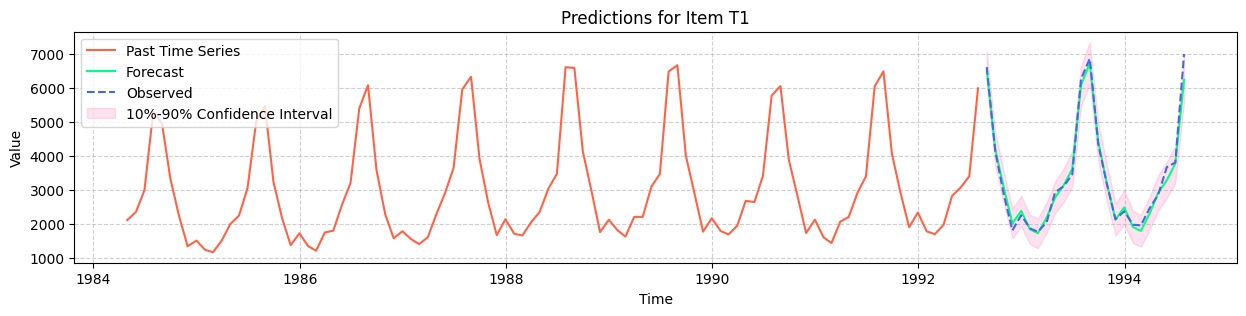

In [ ]:
plot_single_timeseries(train_data, predictions, test_data, item_id = "T1")

In [ ]:
predictions_df.sort_values(by=['MSE'],ascending=False).head(5)

,item_id,MSE
13,T14,7.624863e+09
354,T355,3.748479e+09
179,T180,4.805388e+08
356,T357,3.785097e+08
358,T359,3.447616e+08


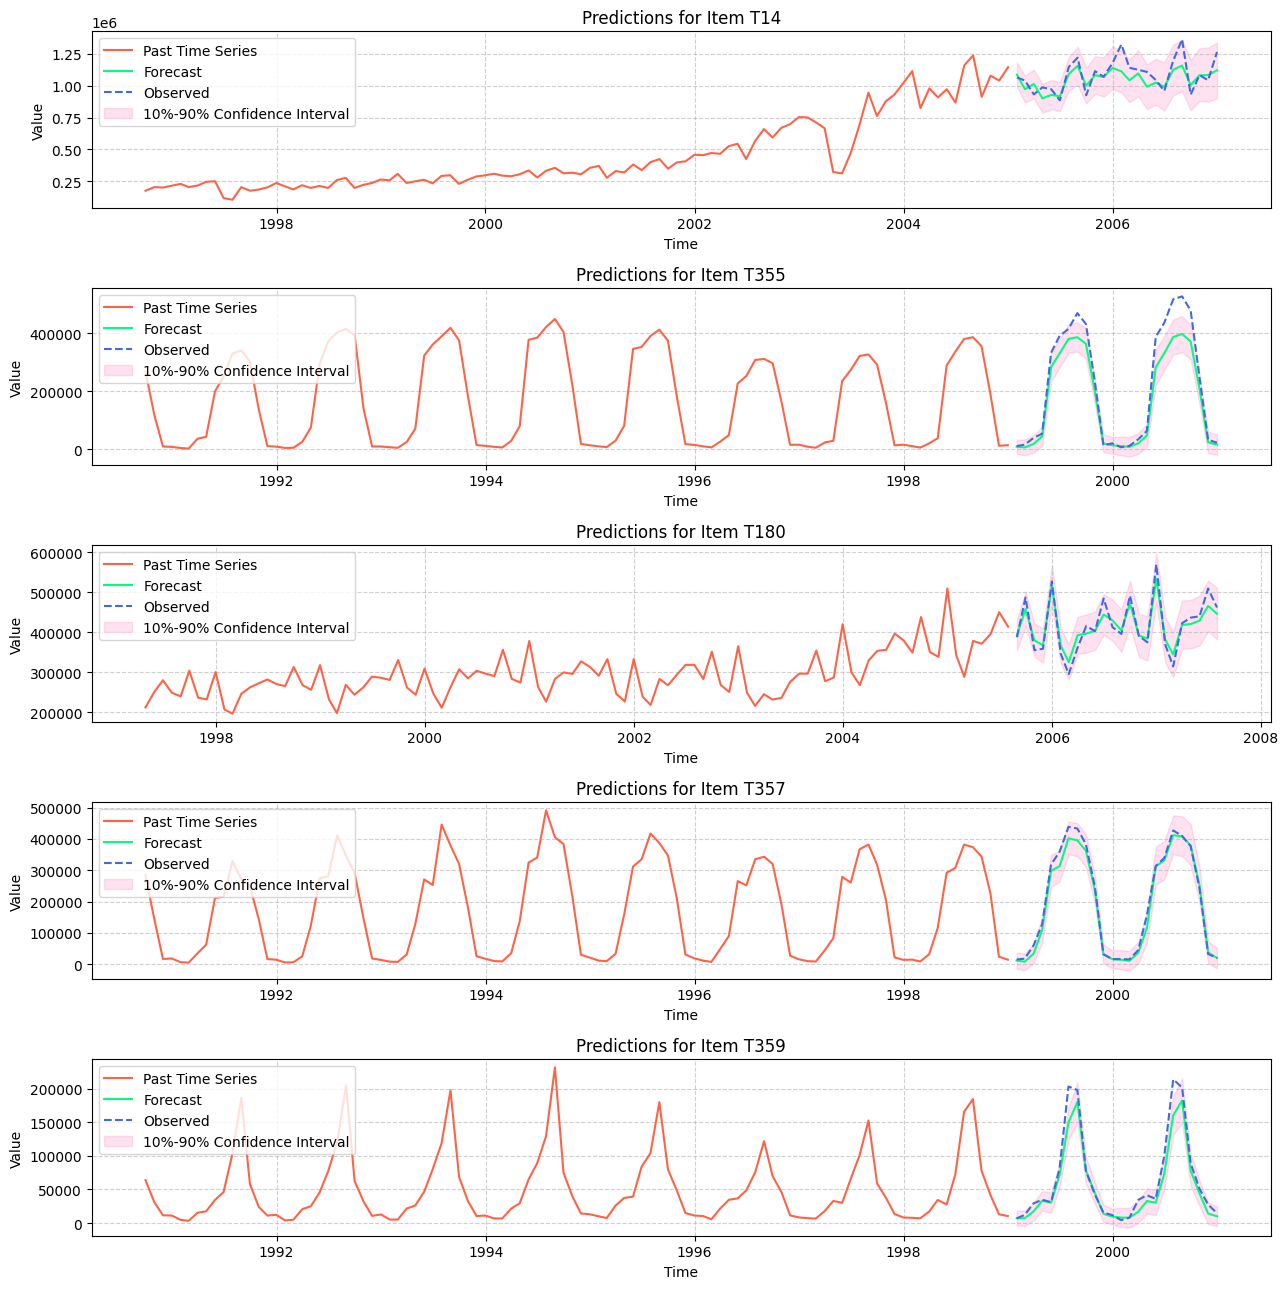

In [ ]:
item_ids_to_plot = predictions_df.sort_values(by=['MSE'],ascending=False).head(5)['item_id'].tolist()
plot_multiple_timeseries(train_data, predictions, test_data, item_ids_to_plot)

#Cross Validation

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=24,
    target="target",
    eval_metric="MASE",
)

predictor.fit(
    train_data,
    presets="best_quality",
    random_seed=45,
    num_val_windows=3
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: best_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'MASE',
 'excluded_model_types': None,
 'hyperparameter_tune_kwargs': {'num_trials': 3,
                                'scheduler': 'local',
                                'searcher': 'auto'},
 'hyperparameters': 'best_quality',
 'num_val_windows': 3,
 'prediction_length': 24,
 'random_seed': 45,
 'target': 'target',
 'time_limit': None,
 'verbosity': 2}
Provided training data set with 100496 rows, 366 items (item = single time series). Average time series length is 274.6. Data frequency is 'M'.

Time series in train_data are too short for the given num_val_windows = 3. Setting num_val_windows = 2
INFO:lightning_fabric.utilities.seed:Global seed set to 45
AutoGluon will save models to multiple-timeseries/tourism-quarterly-best/
AutoGluon will gauge predictive performance using evaluation metric:

  0%|          | 0/3 [00:00<?, ?it/s]

	Trained 3 models while tuning DeepAR.
	-1.8845       = Validation score (-MASE)
	531.21  s     = Total tuning time
Hyperparameter tuning model: TemporalFusionTransformer. 
	-2.0585       = Validation score (-MASE)
	579.37  s     = Training runtime
	0.64    s     = Validation (prediction) runtime
Hyperparameter tuning model: PatchTST. 
	-1.8131       = Validation score (-MASE)
	221.25  s     = Training runtime
	2.19    s     = Validation (prediction) runtime
Hyperparameter tuning model: DirectTabular. 
	-2.2135       = Validation score (-MASE)
	13.36   s     = Training runtime
	0.55    s     = Validation (prediction) runtime
Hyperparameter tuning model: AutoARIMA. 
	-2.0102       = Validation score (-MASE)
	429.45  s     = Training runtime
	580.11  s     = Validation (prediction) runtime
Fitting simple weighted ensemble.
	-1.7516       = Validation score (-MASE)
	18.65   s     = Training runtime
	870.59  s     = Validation (prediction) runtime
Training complete. Models trained: ['Naive

CPU times: user 51min 57s, sys: 11.4 s, total: 52min 9s
Wall time: 52min 42s


In [ ]:
predictions = predictor.predict(train_data)

best_valid_loss = predictor.evaluate(train_data)
best_test_loss = predictor.evaluate(test_data)

best_test_loss_mse = predictor.evaluate(test_data, metrics='MSE')

predictions_df = pd.DataFrame({
    'item_id': test.groupby('item_id').tail(24)['item_id'].values,
    'predictions': predictions.reset_index()['mean'],
    'target': test.groupby('item_id').tail(24)['target'].values
})

predictions_df = predictions_df.groupby('item_id',sort=False).apply(lambda group: mse(group['target'], group['predictions'])).reset_index()
predictions_df.columns = ['item_id', 'MSE']

print(f"Validation MASE loss: {best_valid_loss},  Test MASE loss: {best_test_loss},  Test MSE loss manual {predictions_df['MSE'].mean()}, Test MSE loss Autogluon {best_test_loss_mse}")

INFO:lightning_fabric.utilities.seed:Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Validation MASE loss: -1.6256952331874237,  Test MASE loss: -1.3841523188941163,  Test MSE loss manual: 58128964.75019019, Test MSE loss Autogluon: -58128964.75019018


In [ ]:
predictor.leaderboard(test_data, silent=True)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-1.384152,-1.751619,907.286013,870.594438,18.650593,13
1,DeepAR/T2,-1.443816,-1.884473,2.166070,2.228760,169.125601,7
2,RecursiveTabular,-1.460237,-1.886711,3.130010,4.122701,180.545002,5
3,AutoETS,-1.530622,-1.952590,269.879478,279.397085,244.736804,4
4,PatchTST,-1.550998,-1.813107,1.927982,2.191066,221.253807,10
5,DeepAR/T1,-1.567086,-1.895744,2.586610,1.907864,176.205075,6
6,DeepAR/T3,-1.598868,-1.902498,4.641071,4.847553,185.793031,8
7,SeasonalNaive,-1.630940,-2.035264,0.611660,0.628780,0.857661,2
8,AutoARIMA,-1.686791,-2.010226,626.996371,580.110965,429.450454,12
9,Theta,-1.687446,-2.049646,19.775267,55.187964,15.768811,3


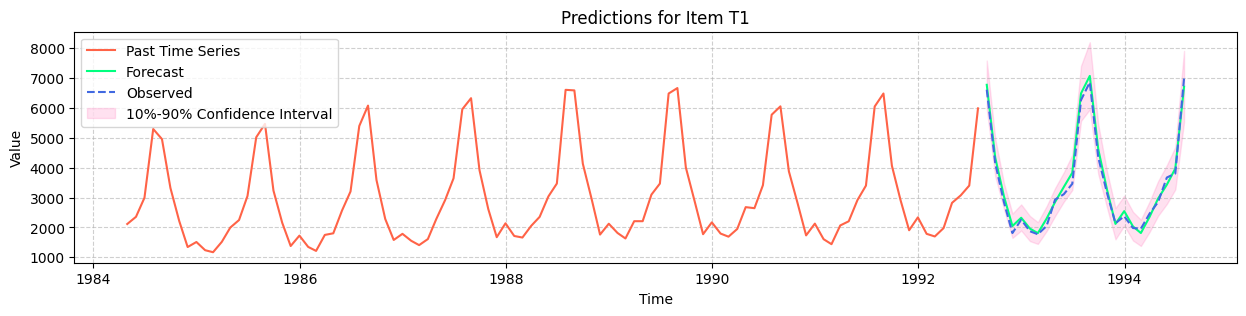

In [ ]:
plot_single_timeseries(train_data, predictions, test_data, item_id = "T1")

In [ ]:
predictions_df.sort_values(by=['MSE'],ascending=False).head(5)

,item_id,MSE
13,T14,1.391037e+10
354,T355,2.672960e+09
179,T180,6.029103e+08
35,T36,5.080041e+08
358,T359,3.767511e+08


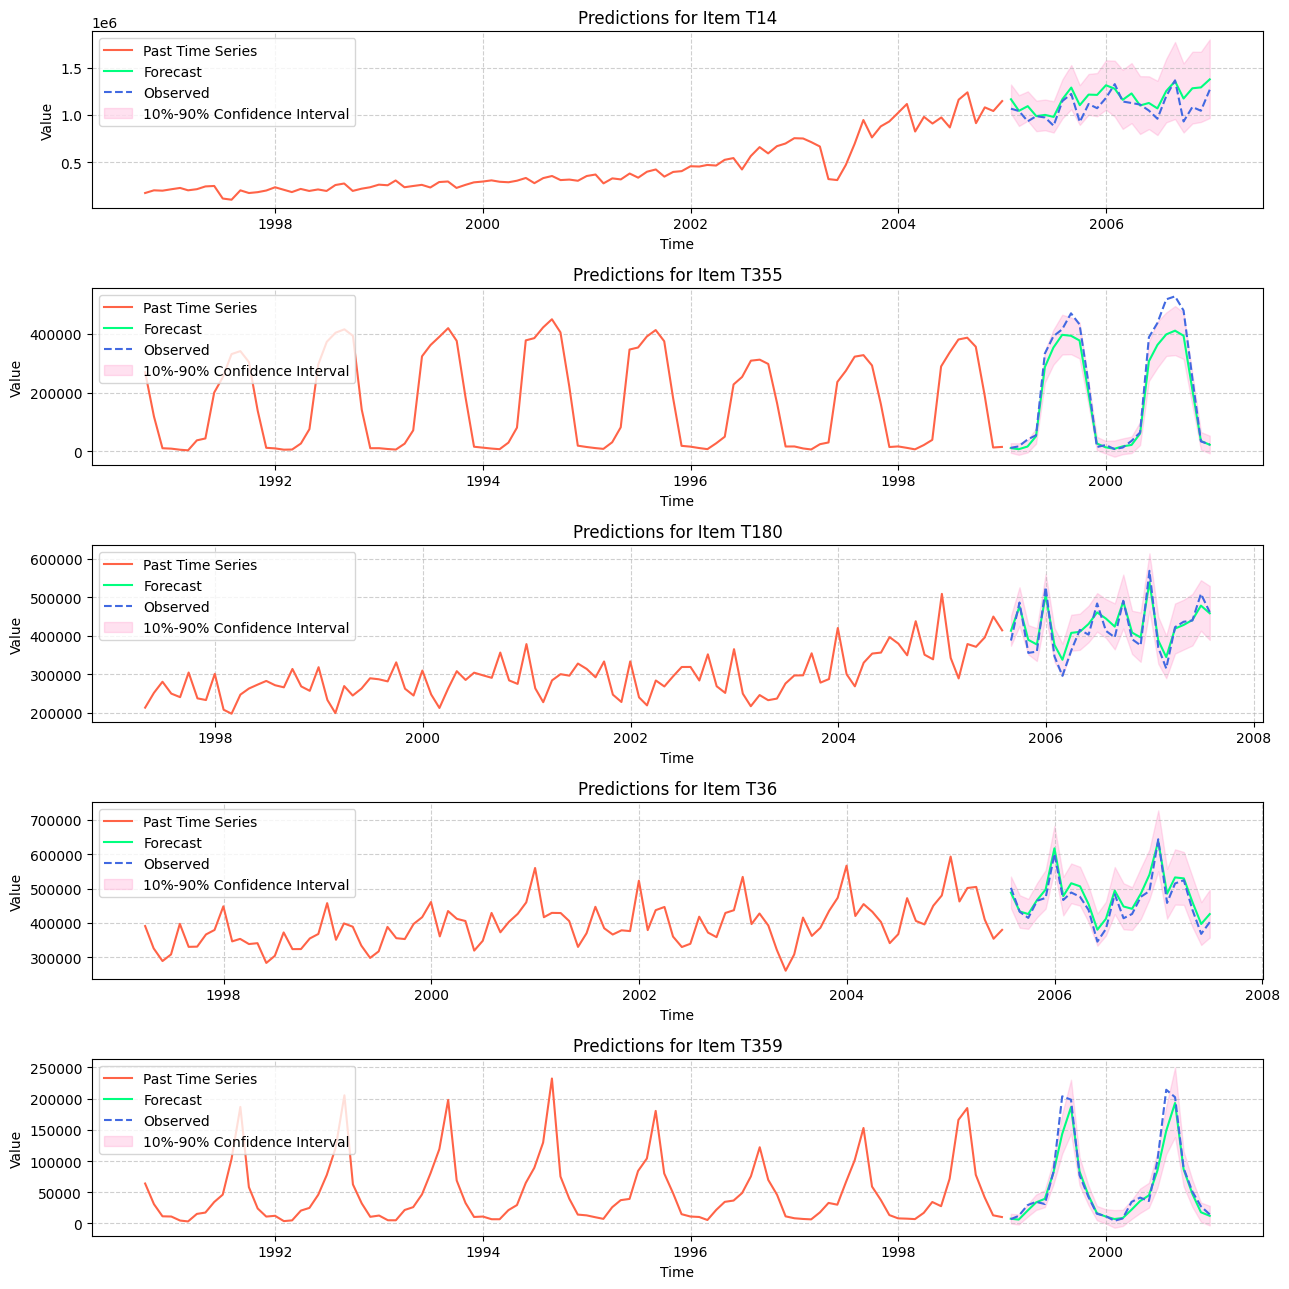

In [ ]:
item_ids_to_plot = predictions_df.sort_values(by=['MSE'],ascending=False).head(5)['item_id'].tolist()
plot_multiple_timeseries(train_data, predictions, test_data, item_ids_to_plot)

# Custom Experiment

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=24,
    target="target",
    eval_metric="MASE",
)

predictor.fit(
    train_data,
    presets="best_quality",
    random_seed=45,
    num_val_windows=3,
    hyperparameters={
    "Naive": {},
    "SeasonalNaive": {},
    'Theta':{},
    'AutoETS':{},
    'RecursiveTabular':{},
    'DirectTabular':{},
    'DynamicOptimizedTheta':{},
    'AutoARIMA':{},
    "DeepAR": [ {"context_length":24}],
    "TemporalFusionTransformer": [ {"context_length":24}],
    "PatchTST": [ {"context_length":24}],

    },hyperparameter_tune_kwargs=None
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: best_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'MASE',
 'excluded_model_types': None,
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': {'AutoARIMA': {},
                     'AutoETS': {},
                     'DeepAR': [{'context_length': 24}],
                     'DirectTabular': {},
                     'DynamicOptimizedTheta': {},
                     'Naive': {},
                     'PatchTST': [{'context_length': 24}],
                     'RecursiveTabular': {},
                     'SeasonalNaive': {},
                     'TemporalFusionTransformer': [{'context_length': 24}],
                     'Theta': {}},
 'num_val_windows': 3,
 'prediction_length': 24,
 'random_seed': 45,
 'target': 'target',
 'time_limit': None,
 'verbosity': 2}
Provided training data set with 100496 rows, 366 items (item = single time series). Averag

CPU times: user 46min 54s, sys: 17.9 s, total: 47min 12s
Wall time: 47min 47s


In [ ]:
predictions = predictor.predict(train_data)

best_valid_loss = predictor.evaluate(train_data)
best_test_loss = predictor.evaluate(test_data)
best_test_loss_mse = predictor.evaluate(test_data, metrics='MSE')

predictions_df = pd.DataFrame({
    'item_id': test.groupby('item_id').tail(24)['item_id'].values,
    'predictions': predictions.reset_index()['mean'],
    'target': test.groupby('item_id').tail(24)['target'].values
})

predictions_df = predictions_df.groupby('item_id',sort=False).apply(lambda group: mse(group['target'], group['predictions'])).reset_index()
predictions_df.columns = ['item_id', 'MSE']

print(f"Validation MASE loss: {best_valid_loss},  Test MASE loss: {best_test_loss},  Test MSE loss manual {predictions_df['MSE'].mean()}, Test MSE loss Autogluon {best_test_loss_mse}")

INFO:lightning_fabric.utilities.seed:Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Validation MASE loss: -1.6663234092577592,  Test MASE loss: -1.3761754329132037,  Test MSE loss manual: 45603878.07061294, Test MSE loss Autogluon: -45603878.07061293


In [ ]:
predictor.leaderboard(test_data, silent=True)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-1.376175,-1.765877,1009.665116,957.466206,17.593184,12
1,DeepAR,-1.467700,-1.844835,2.669828,2.419708,172.348296,6
2,AutoETS,-1.530462,-1.952590,301.045079,300.958900,281.031123,4
3,PatchTST,-1.602985,-1.858238,2.311397,1.473857,211.201276,8
4,TemporalFusionTransformer,-1.606399,-1.972209,0.998565,0.691120,600.873705,7
5,SeasonalNaive,-1.630940,-2.035264,1.158082,0.933698,0.932787,2
6,RecursiveTabular,-1.639185,-1.947318,1.710935,1.744258,20.771947,5
7,AutoARIMA,-1.681805,-2.007750,679.648830,599.247896,492.990592,11
8,Theta,-1.687446,-2.049646,19.376927,49.414456,14.838556,3
9,DynamicOptimizedTheta,-1.705616,-2.070212,52.394099,42.014607,37.542329,10


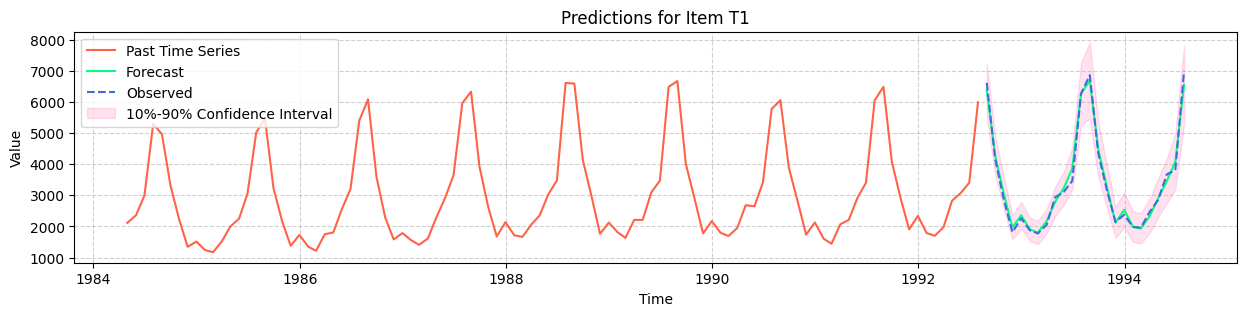

In [ ]:
plot_single_timeseries(train_data, predictions, test_data, item_id = "T1")

In [ ]:
predictions_df.sort_values(by=['MSE'],ascending=False).head(5)

,item_id,MSE
13,T14,8.278827e+09
354,T355,3.695514e+09
179,T180,4.908618e+08
358,T359,4.866377e+08
35,T36,4.472146e+08


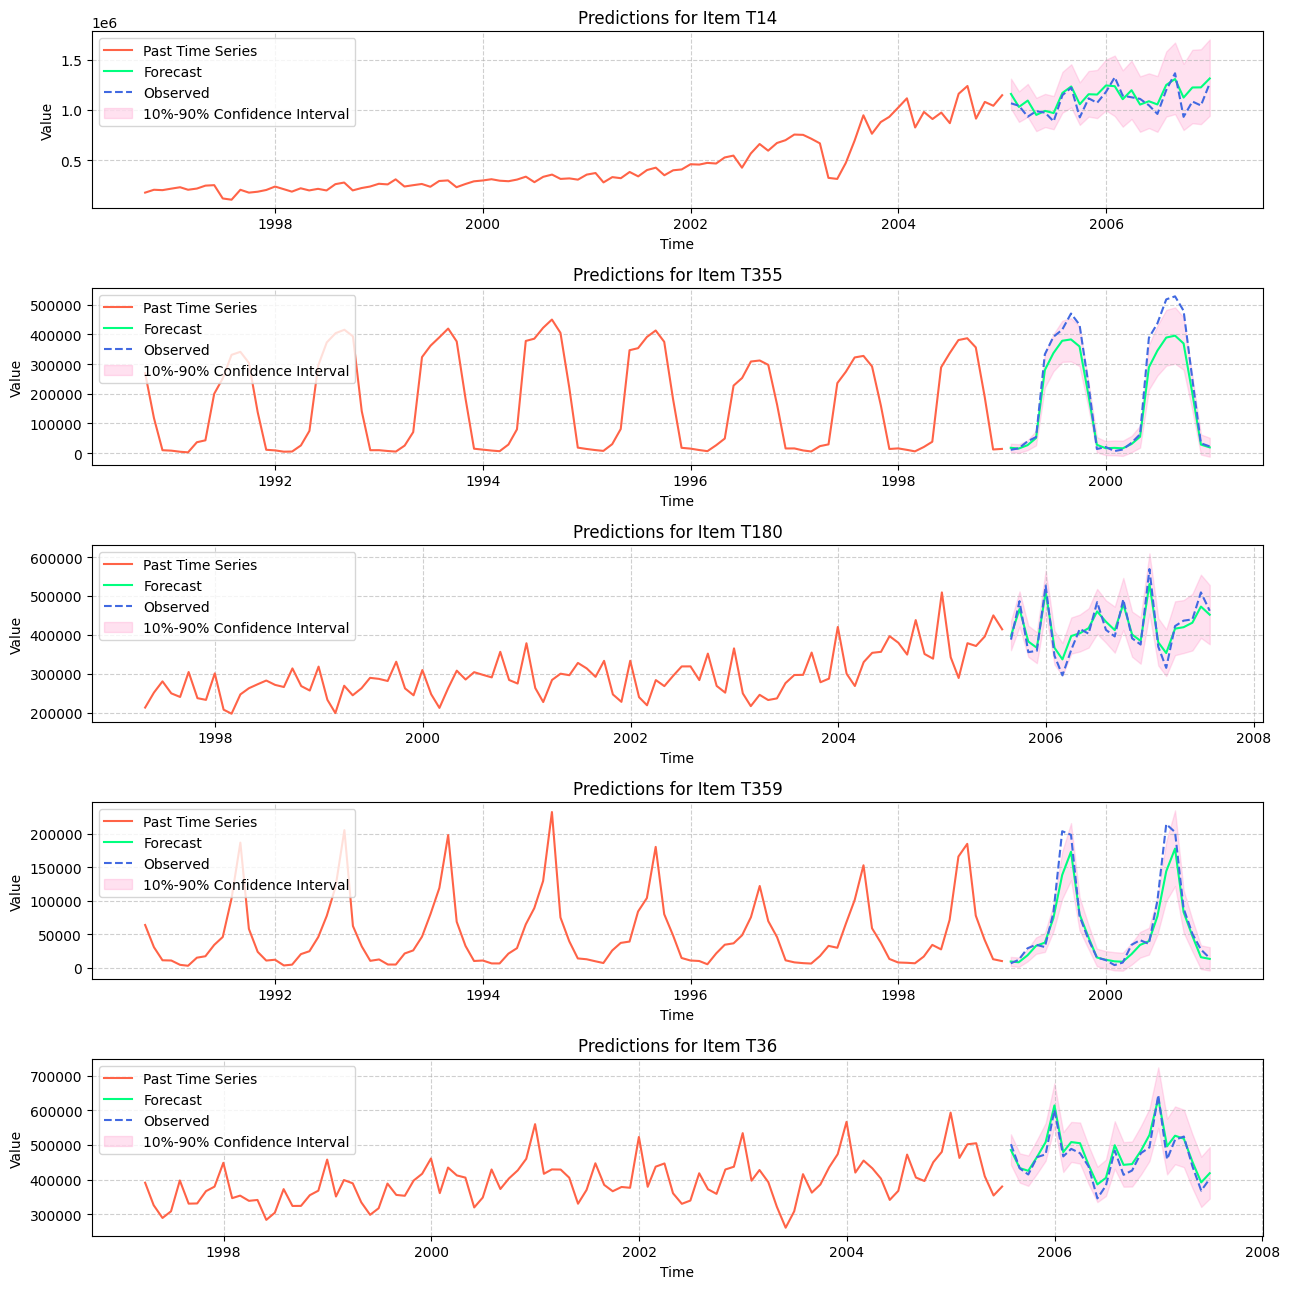

In [ ]:
item_ids_to_plot = predictions_df.sort_values(by=['MSE'],ascending=False).head(5)['item_id'].tolist()
plot_multiple_timeseries(train_data, predictions, test_data, item_ids_to_plot)

# Example with static features and covariates

In [ ]:
train = long_format(dataset.train)
test = long_format(dataset.test)

train_data = TimeSeriesDataFrame.from_data_frame(
    train,
    id_column="item_id",
    timestamp_column="start"
)

test_data = TimeSeriesDataFrame.from_data_frame(
    test,
    id_column="item_id",
    timestamp_column="start"
)

train_data = train_data.reset_index().groupby('item_id', sort=False).resample('M', on='timestamp').sum().drop(columns=['item_id'])
test_data = test_data.reset_index().groupby('item_id', sort=False).resample('M', on='timestamp').sum().drop(columns=['item_id'])

test_data

target
item_id timestamp              
T1      1979-01-31  1149.869995
        1979-02-28  1053.800171
        1979-03-31  1388.879761
        1979-04-30  1783.370239
        1979-05-31  1921.025146
...                         ...
T366    2000-08-31  7778.000000
        2000-09-30  7859.000000
        2000-10-31  4802.000000
        2000-11-30  2426.000000
        2000-12-31   637.000000

[109280 rows x 1 columns]

In [ ]:
test.groupby('item_id')['target'].count().min()

91

In [ ]:
static_features = pd.DataFrame({'item_id':train['item_id'].unique(), 'domain':train['item_id'].unique() }).set_index('item_id')
static_features

,domain
item_id,
T1,T1
T2,T2
T3,T3
T4,T4
T5,T5
...,...
T362,T362
T363,T363
T364,T364


In [ ]:
train_data.static_features = static_features
test_data.static_features = static_features

In [ ]:
timestamps_train = train_data.index.get_level_values("timestamp")
earliest_time = timestamps_train.min()
train_data["month"] = timestamps_train.month
train_data["days_from_start"] = (timestamps_train - earliest_time).days.values

timestamps_test = test_data.index.get_level_values("timestamp")
test_data["month"] = timestamps_test.month
test_data["days_from_start"] = (timestamps_test - earliest_time).days.values

In [ ]:
timestamps_train.min()

Timestamp('1979-01-31 00:00:00')

In [ ]:
train_data

target  month  days_from_start
item_id timestamp                                      
T1      1979-01-31  1149.869995      1                0
        1979-02-28  1053.800171      2               28
        1979-03-31  1388.879761      3               59
        1979-04-30  1783.370239      4               89
        1979-05-31  1921.025146      5              120
...                         ...    ...              ...
T366    1998-08-31  3900.000000      8             7152
        1998-09-30  4525.000000      9             7182
        1998-10-31  2854.000000     10             7213
        1998-11-30  1794.000000     11             7243
        1998-12-31   921.000000     12             7274

[100496 rows x 3 columns]

In [ ]:
test_data

target  month  days_from_start
item_id timestamp                                      
T1      1979-01-31  1149.869995      1                0
        1979-02-28  1053.800171      2               28
        1979-03-31  1388.879761      3               59
        1979-04-30  1783.370239      4               89
        1979-05-31  1921.025146      5              120
...                         ...    ...              ...
T366    2000-08-31  7778.000000      8             7883
        2000-09-30  7859.000000      9             7913
        2000-10-31  4802.000000     10             7944
        2000-11-30  2426.000000     11             7974
        2000-12-31   637.000000     12             8005

[109280 rows x 3 columns]

In [ ]:
multiple_timeseries_path = "multiple-timeseries-covariates"
model_path_fast= "tourism-quarterly-fast"

path = os.path.join(multiple_timeseries_path, model_path_fast)

predictor = TimeSeriesPredictor(
    prediction_length=24,
    target="target",
    path=path,
    known_covariates_names=["month","days_from_start"],
    eval_metric="MSE"
).fit(train_data,presets="fast_training", random_seed=42)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: fast_training
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'MSE',
 'excluded_model_types': None,
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'fast_training',
 'num_val_windows': 1,
 'prediction_length': 24,
 'random_seed': 42,
 'target': 'target',
 'time_limit': None,
 'verbosity': 2}
Provided training data set with 100496 rows, 366 items (item = single time series). Average time series length is 274.6. Data frequency is 'M'.
INFO:lightning_fabric.utilities.seed:Global seed set to 42
AutoGluon will save models to multiple-timeseries-covariates/tourism-quarterly-fast/
AutoGluon will gauge predictive performance using evaluation metric: 'MSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:      

In [ ]:
from autogluon.timeseries.utils.forecast import get_forecast_horizon_index_ts_dataframe

future_index = get_forecast_horizon_index_ts_dataframe(train_data, prediction_length=24)
future_timestamps = future_index.get_level_values("timestamp")
known_covariates = pd.DataFrame(index=future_index)
known_covariates["month"] = future_timestamps.month
known_covariates["days_from_start"] = (future_timestamps - earliest_time).days.values

known_covariates

month  days_from_start
item_id timestamp                         
T1      1992-08-31      8             4961
        1992-09-30      9             4991
        1992-10-31     10             5022
        1992-11-30     11             5052
        1992-12-31     12             5083
...                   ...              ...
T366    2000-08-31      8             7883
        2000-09-30      9             7913
        2000-10-31     10             7944
        2000-11-30     11             7974
        2000-12-31     12             8005

[8784 rows x 2 columns]

In [ ]:
known_covariates = TimeSeriesDataFrame(known_covariates)

In [ ]:
# !cd multiple-timeseries-covariates && zip -r -q tourism-quarterly-fast.zip tourism-quarterly-fast
subprocess.run(["zip", "-r", "-q", f"{model_path_fast}.zip", model_path_fast], cwd=multiple_timeseries_path)

# !cd multiple-timeseries-covariates && rm -r tourism-quarterly-fast
subprocess.run(["rm", "-r", model_path_fast], cwd=multiple_timeseries_path)

# !cd multiple-timeseries-covariates && unzip tourism-quarterly-fast.zip
subprocess.run(["unzip", f"{model_path_fast}.zip"], cwd=multiple_timeseries_path)
predictor = TimeSeriesPredictor.load(path)

Loading predictor from path multiple-timeseries-covariates/tourism-quarterly-fast/


In [ ]:
predictions = predictor.predict(train_data, known_covariates=known_covariates)

fast_valid_loss = predictor.evaluate(train_data)
fast_test_loss = predictor.evaluate(test_data)

predictions_df = pd.DataFrame({
    'item_id': test.groupby('item_id').tail(24)['item_id'].values,
    'predictions': predictions.reset_index()['mean'],
    'target': test.groupby('item_id').tail(24)['target'].values
})

predictions_df = predictions_df.groupby('item_id',sort=False).apply(lambda group: mse(group['target'], group['predictions'])).reset_index()
predictions_df.columns = ['item_id', 'MSE']

print(f"Validation loss: {fast_valid_loss},  Test loss: {fast_test_loss},  Test loss manual {predictions_df['MSE'].mean()}")

INFO:lightning_fabric.utilities.seed:Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


Validation loss: -161655506.58807895,  Test loss: -54501573.8866499,  Test loss manual 54501573.8866499


In [ ]:
predictor.leaderboard(test_data, silent=True)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-5.450157e+07,-1.616555e+08,83.569312,75.784851,9.184469,6
1,SeasonalNaive,-6.726176e+07,-4.434256e+08,1.144803,1.832614,0.341598,2
2,ETS,-7.193954e+07,-1.835316e+08,82.373169,73.952237,0.459777,4
3,Theta,-8.053012e+07,-3.111759e+08,42.633359,74.087482,0.239720,3
4,RecursiveTabular,-2.267687e+08,-5.709142e+08,2.669739,2.334773,29.735993,5
5,Naive,-6.191112e+08,-6.523117e+08,3.498718,2.047996,0.430166,1


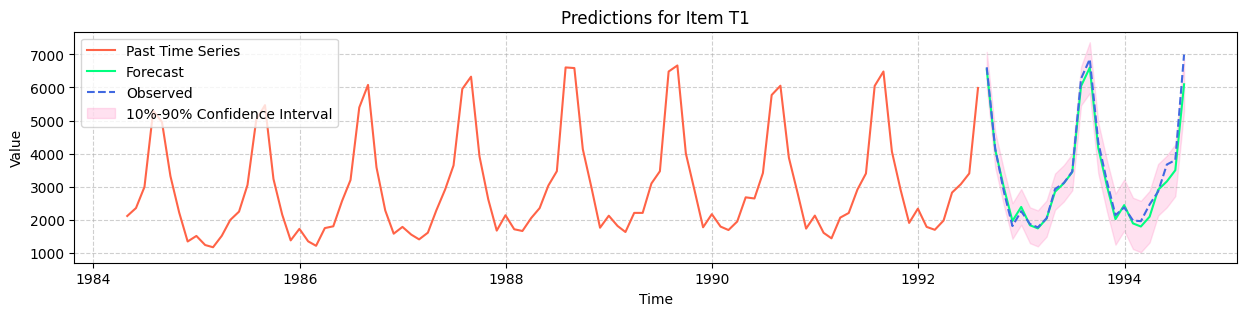

In [ ]:
plot_single_timeseries(train_data, predictions, test_data, item_id = "T1")

In [ ]:
predictions_df.sort_values(by=['MSE'],ascending=False).head(5)

,item_id,MSE
13,T14,1.024772e+10
354,T355,4.420496e+09
356,T357,1.389108e+09
179,T180,3.918555e+08
35,T36,2.702366e+08


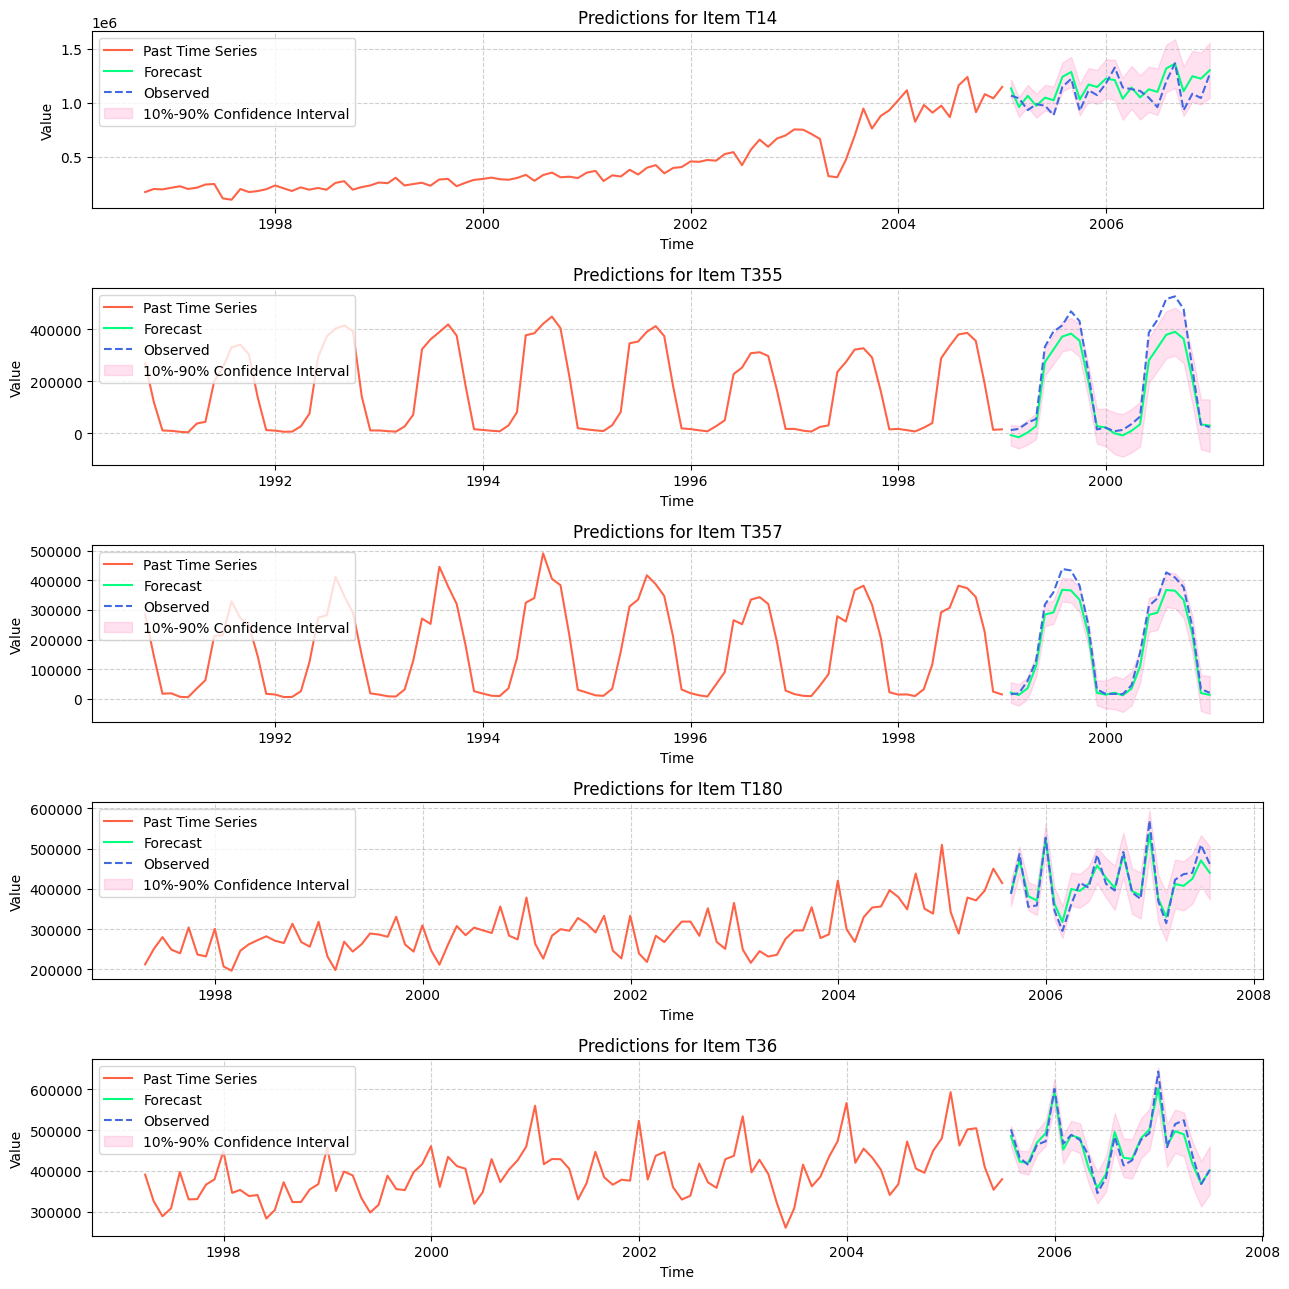

In [ ]:
item_ids_to_plot = predictions_df.sort_values(by=['MSE'],ascending=False).head(5)['item_id'].tolist()
plot_multiple_timeseries(train_data, predictions, test_data, item_ids_to_plot)

# Hyperparameter Tuning

In [ ]:
from autogluon.common import space

 * space.Categorical() for discrete hyperparameters
 * space.Int(lower, upper) for continuous hyperparameters
 * hyperparameter_tune_kwargs="auto"


In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=24,
    target="target",
    eval_metric="MSE",
)

predictor.fit(
    train_data,
    random_seed=49,
    hyperparameters={
    "DeepAR": {
        "hidden_size": space.Categorical(50, 100),
        "num_layers" : space.Categorical(2, 4),
    },
    },hyperparameter_tune_kwargs="auto",
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'MSE',
 'excluded_model_types': None,
 'hyperparameter_tune_kwargs': 'auto',
 'hyperparameters': {'DeepAR': {'hidden_size': Categorical[50, 100],
                                'num_layers': Categorical[2, 4]}},
 'num_val_windows': 1,
 'prediction_length': 24,
 'random_seed': 49,
 'target': 'target',
 'time_limit': None,
 'verbosity': 2}
Provided training data set with 100496 rows, 366 items (item = single time series). Average time series length is 274.6. Data frequency is 'M'.
INFO:lightning_fabric.utilities.seed:Global seed set to 49
AutoGluon will save models to multiple-timeseries2/tourism-quarterly-medium/
AutoGluon will gauge predictive performance using evaluation metric: 'MSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.



  0%|          | 0/10 [00:00<?, ?it/s]

Stopping HPO due to exhausted search space: 4 of 4 possible configs ran.
	Trained 4 models while tuning DeepAR.
	-151484816.5745= Validation score (-MSE)
	419.04  s     = Total tuning time
Fitting simple weighted ensemble.
	-151484816.5745= Validation score (-MSE)
	5.88    s     = Training runtime
	11.40   s     = Validation (prediction) runtime
Training complete. Models trained: ['DeepAR/T1', 'DeepAR/T2', 'DeepAR/T3', 'DeepAR/T4', 'WeightedEnsemble']
Total runtime: 425.13 s
Best model: DeepAR/T3
Best model score: -151484816.5745


CPU times: user 6min 46s, sys: 2.77 s, total: 6min 49s
Wall time: 7min 6s
